# Random Forest Implementation

In [61]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [50]:
#load dataset
df=pd.read_csv('data.csv')

In [51]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [52]:
df.shape

(348, 12)

In [53]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [55]:
df.isna().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [56]:
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

Text(0.5, 1.0, 'Actual Temperature')

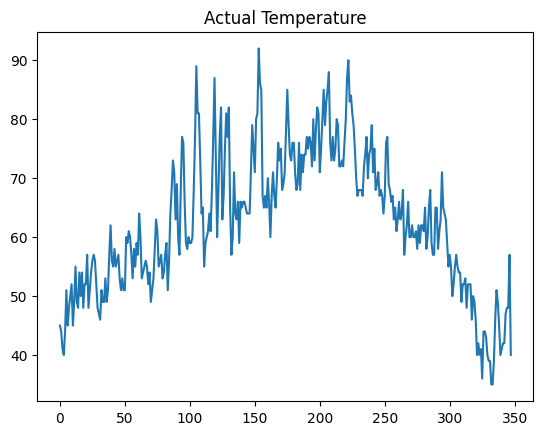

In [57]:
plt.plot(df['actual'])
plt.title("Actual Temperature")

Text(0.5, 1.0, 'Friend')

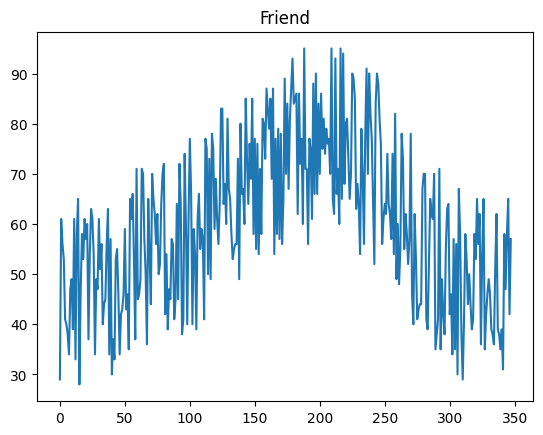

In [58]:
plt.plot(df['friend'])
plt.title("Friend")

In [59]:
# converting labels into numerical values
#using label encoder
#one-hot encoding
features=pd.get_dummies(df)

features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,46.0,44,46,46,46,41,False,False,False,False,False,True,False


In [60]:
# Labels are the values we want to predict
labels = np.array(features['actual'])
#remove the labels from the features
# features=features.drop('actual',axis=1)
feature_list=list(features.columns)

features=np.array(features)

In [62]:
#split data
X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.3)

In [67]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((243, 18), (243,), (105, 18), (105,))

In [70]:
# The baseline predictions are the historical averages
baseline_preds = X_test[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - Y_test)

print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  4.93


In [72]:
#Loading model
rf=RandomForestClassifier(n_estimators=1000,random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [75]:
y_pred=rf.predict(X_test)
y_pred

#Calculate Errors
error=abs(y_pred-Y_test)
error

array([ 1,  1,  0,  7,  1,  2,  8,  3,  0,  3,  0,  1,  0,  0,  0,  1,  2,
        0,  0,  0,  0,  1,  2,  1,  5,  7,  2,  3,  1,  1,  1,  1,  8,  1,
        0,  5,  1,  0,  0,  0,  3,  4, 12,  7,  0,  1,  1,  0,  1,  2,  0,
        1,  0,  1,  0,  1,  0,  0,  4,  0,  1,  1,  3,  2,  0,  3,  1,  3,
        0,  0,  1,  1,  0,  7,  1,  0,  0,  0,  0,  0,  2,  4,  0,  0,  3,
        2,  0,  9,  2,  7,  4,  1,  1,  1,  2,  0,  1,  0,  5,  4,  0,  3,
        2,  1,  3])

In [78]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (error / Y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 97.08 %.


In [81]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])